# Classicial Planning Analysis

## Data Preprocessing

In [35]:
# Import python libraries for model development
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('report_data.csv')

In [37]:
df.head()

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time,Unnamed: 7,Unnamed: 8
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725,NaN,NaN
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548,NaN,NaN
2,Air Cargo 1,uniform_cost_search,6.0,20.0,60.0,240.0,0.030729,NaN,NaN
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853,NaN,NaN
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435,NaN,NaN


In [38]:
df = df.drop(columns=['Unnamed: 7', 'Unnamed: 8'])

In [39]:
df.describe()

,Plan Length,Actions,Expansions,New_Nodes,Time
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000
mean,36.763158,66.631579,8062.736842,7.536679e+04,115.264605
std,115.103581,32.098178,24477.786241,2.309008e+05,326.054381
min,6.000000,20.000000,6.000000,2.400000e+01,0.002853
25%,6.750000,20.000000,21.000000,1.447500e+02,0.348561
50%,9.000000,72.000000,46.500000,2.645000e+02,5.128846
75%,14.000000,88.000000,2152.250000,1.994400e+04,21.921078
max,619.000000,104.000000,113339.000000,1.066413e+06,1599.322760


In [41]:
df = df.dropna(axis=0)

In [42]:
df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548
2,Air Cargo 1,uniform_cost_search,6.0,20.0,60.0,240.0,0.030729
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0,20.0,6.0,28.0,0.685915
7,Air Cargo 1,astar_search h_unmet_goals,6.0,20.0,50.0,206.0,0.026745
8,Air Cargo 1,astar_search h_pg_levelsum,6.0,20.0,28.0,122.0,0.591940
9,Air Cargo 1,astar_search h_pg_maxlevel,6.0,20.0,43.0,180.0,0.642644


## Question 1
##### Use a table or chart to analyze the number of nodes expanded against number of actions in the domain

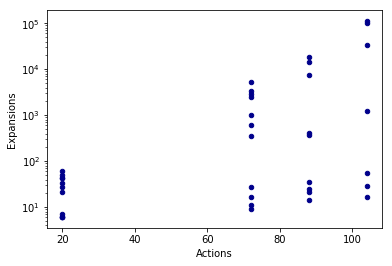

In [55]:
df.plot.scatter(x='Actions', y='Expansions', c='DarkBlue', logy=True)

In [93]:
actions20 = df['Actions']==20
actions20_df = df[actions20]
actions20_df.sort_values(by=['Expansions'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0,20.0,6.0,28.0,0.685915
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548
8,Air Cargo 1,astar_search h_pg_levelsum,6.0,20.0,28.0,122.0,0.591940
10,Air Cargo 1,astar_search h_pg_setlevel,6.0,20.0,33.0,138.0,1.615501
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725
9,Air Cargo 1,astar_search h_pg_maxlevel,6.0,20.0,43.0,180.0,0.642644
7,Air Cargo 1,astar_search h_unmet_goals,6.0,20.0,50.0,206.0,0.026745


In [90]:
actions72 = df['Actions']==72
actions72_df = df[actions72]
actions72_df.sort_values(by=['Expansions'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
17,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,9.0,72.0,9.0,84.0,20.535056
15,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,9.0,72.0,11.0,86.0,5.324338
14,Air Cargo 2,greedy_best_first_graph_search h_unmet_goals,9.0,72.0,17.0,170.0,0.033020
16,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,9.0,72.0,27.0,249.0,8.308828
19,Air Cargo 2,astar_search h_pg_levelsum,9.0,72.0,357.0,3426.0,141.020214
12,Air Cargo 2,depth_first_graph_search,619.0,72.0,624.0,5602.0,3.927302
21,Air Cargo 2,astar_search h_pg_setlevel,9.0,72.0,1037.0,9605.0,1599.322760
18,Air Cargo 2,astar_search h_unmet_goals,9.0,72.0,2467.0,22522.0,3.123567
20,Air Cargo 2,astar_search h_pg_maxlevel,9.0,72.0,2887.0,26594.0,925.653842
11,Air Cargo 2,breadth_first_search,9.0,72.0,3343.0,30503.0,3.209949


In [91]:
actions88 = df['Actions']==88
actions88_df = df[actions88]
actions88_df
actions88_df.sort_values(by=['Expansions'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
26,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,14.0,88.0,14.0,126.0,12.787025
27,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,13.0,88.0,21.0,195.0,12.614300
25,Air Cargo 3,greedy_best_first_graph_search h_unmet_goals,15.0,88.0,25.0,230.0,0.073953
28,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,17.0,88.0,35.0,345.0,98.556015
30,Air Cargo 3,astar_search h_pg_levelsum,12.0,88.0,369.0,3403.0,268.832396
23,Air Cargo 3,depth_first_graph_search,392.0,88.0,408.0,3364.0,1.652330
29,Air Cargo 3,astar_search h_unmet_goals,12.0,88.0,7388.0,65711.0,13.789529
22,Air Cargo 3,breadth_first_search,12.0,88.0,14663.0,129625.0,16.081353
24,Air Cargo 3,uniform_cost_search,12.0,88.0,18510.0,161936.0,21.110852


In [92]:
actions104 = df['Actions']==104
actions104_df = df[actions104]
actions104_df.sort_values(by=['Expansions'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
37,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,17.0,104.0,17.0,165.0,13.648721
36,Air Cargo 4,greedy_best_first_graph_search h_unmet_goals,18.0,104.0,29.0,280.0,0.052704
38,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,17.0,104.0,56.0,580.0,22.191153
41,Air Cargo 4,astar_search h_pg_levelsum,15.0,104.0,1208.0,12210.0,948.859392
40,Air Cargo 4,astar_search h_unmet_goals,14.0,104.0,34330.0,328509.0,47.727950
33,Air Cargo 4,breadth_first_search,14.0,104.0,99736.0,944130.0,85.410903
35,Air Cargo 4,uniform_cost_search,14.0,104.0,113339.0,1066413.0,97.271088


### Question 1 Observations:
Uniform Cost Search has the most number of node expansions over all action domains. The Greedy Best First Graph search algorithm (with various heuristics) has the fewest number of node expansions across all action domains.

## Question 2
##### Use a table or chart to analyze the search time against the number of actions in the domain

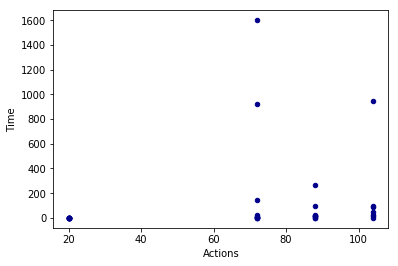

In [63]:
df.plot.scatter(x='Actions', y='Time', c='DarkBlue')

In [95]:
actions20_df.sort_values(by=['Time'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725
7,Air Cargo 1,astar_search h_unmet_goals,6.0,20.0,50.0,206.0,0.026745
2,Air Cargo 1,uniform_cost_search,6.0,20.0,60.0,240.0,0.030729
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435
8,Air Cargo 1,astar_search h_pg_levelsum,6.0,20.0,28.0,122.0,0.591940
9,Air Cargo 1,astar_search h_pg_maxlevel,6.0,20.0,43.0,180.0,0.642644
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0,20.0,6.0,28.0,0.685915


In [100]:
actions72_df.sort_values(by=['Time'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
14,Air Cargo 2,greedy_best_first_graph_search h_unmet_goals,9.0,72.0,17.0,170.0,0.033020
18,Air Cargo 2,astar_search h_unmet_goals,9.0,72.0,2467.0,22522.0,3.123567
11,Air Cargo 2,breadth_first_search,9.0,72.0,3343.0,30503.0,3.209949
12,Air Cargo 2,depth_first_graph_search,619.0,72.0,624.0,5602.0,3.927302
13,Air Cargo 2,uniform_cost_search,9.0,72.0,5154.0,46618.0,4.933355
15,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,9.0,72.0,11.0,86.0,5.324338
16,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,9.0,72.0,27.0,249.0,8.308828
17,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,9.0,72.0,9.0,84.0,20.535056
19,Air Cargo 2,astar_search h_pg_levelsum,9.0,72.0,357.0,3426.0,141.020214
20,Air Cargo 2,astar_search h_pg_maxlevel,9.0,72.0,2887.0,26594.0,925.653842


In [99]:
actions88_df.sort_values(by=['Time'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
25,Air Cargo 3,greedy_best_first_graph_search h_unmet_goals,15.0,88.0,25.0,230.0,0.073953
23,Air Cargo 3,depth_first_graph_search,392.0,88.0,408.0,3364.0,1.652330
27,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,13.0,88.0,21.0,195.0,12.614300
26,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,14.0,88.0,14.0,126.0,12.787025
29,Air Cargo 3,astar_search h_unmet_goals,12.0,88.0,7388.0,65711.0,13.789529
22,Air Cargo 3,breadth_first_search,12.0,88.0,14663.0,129625.0,16.081353
24,Air Cargo 3,uniform_cost_search,12.0,88.0,18510.0,161936.0,21.110852
28,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,17.0,88.0,35.0,345.0,98.556015
30,Air Cargo 3,astar_search h_pg_levelsum,12.0,88.0,369.0,3403.0,268.832396


In [98]:
actions104_df.sort_values(by=['Time'])

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
36,Air Cargo 4,greedy_best_first_graph_search h_unmet_goals,18.0,104.0,29.0,280.0,0.052704
37,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,17.0,104.0,17.0,165.0,13.648721
38,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,17.0,104.0,56.0,580.0,22.191153
40,Air Cargo 4,astar_search h_unmet_goals,14.0,104.0,34330.0,328509.0,47.727950
33,Air Cargo 4,breadth_first_search,14.0,104.0,99736.0,944130.0,85.410903
35,Air Cargo 4,uniform_cost_search,14.0,104.0,113339.0,1066413.0,97.271088
41,Air Cargo 4,astar_search h_pg_levelsum,15.0,104.0,1208.0,12210.0,948.859392


### Question 2 Observations:
A* search with various heuristics takes the most amount of time to search in any given action domain.
Greedy best first graph search with h_unmet_goals takes the least amount of search time for all action domains.

## Question 3
##### Use a table or chart to analyze the length of the plans returned by each algorithm on all search problems

In [68]:
bfs = df['Search']=='breadth_first_search'
bfs_df = df[bfs]
bfs_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
0,Air Cargo 1,breadth_first_search,6.0,20.0,43.0,178.0,0.013725
11,Air Cargo 2,breadth_first_search,9.0,72.0,3343.0,30503.0,3.209949
22,Air Cargo 3,breadth_first_search,12.0,88.0,14663.0,129625.0,16.081353
33,Air Cargo 4,breadth_first_search,14.0,104.0,99736.0,944130.0,85.410903


In [69]:
dfs = df['Search']=='depth_first_graph_search'
dfs_df = df[dfs]
dfs_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
1,Air Cargo 1,depth_first_graph_search,20.0,20.0,21.0,84.0,0.007548
12,Air Cargo 2,depth_first_graph_search,619.0,72.0,624.0,5602.0,3.927302
23,Air Cargo 3,depth_first_graph_search,392.0,88.0,408.0,3364.0,1.652330


In [70]:
ufs = df['Search']=='uniform_cost_search'
ufs_df = df[ufs]
ufs_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
2,Air Cargo 1,uniform_cost_search,6.0,20.0,60.0,240.0,0.030729
13,Air Cargo 2,uniform_cost_search,9.0,72.0,5154.0,46618.0,4.933355
24,Air Cargo 3,uniform_cost_search,12.0,88.0,18510.0,161936.0,21.110852
35,Air Cargo 4,uniform_cost_search,14.0,104.0,113339.0,1066413.0,97.271088


In [72]:
greedy_unmet_goals = df['Search']=='greedy_best_first_graph_search h_unmet_goals'
greedy_unmet_goals_df = df[greedy_unmet_goals]
greedy_unmet_goals_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
3,Air Cargo 1,greedy_best_first_graph_search h_unmet_goals,6.0,20.0,7.0,29.0,0.002853
14,Air Cargo 2,greedy_best_first_graph_search h_unmet_goals,9.0,72.0,17.0,170.0,0.033020
25,Air Cargo 3,greedy_best_first_graph_search h_unmet_goals,15.0,88.0,25.0,230.0,0.073953
36,Air Cargo 4,greedy_best_first_graph_search h_unmet_goals,18.0,104.0,29.0,280.0,0.052704


In [73]:
greedy_levelsum = df['Search']=='greedy_best_first_graph_search h_pg_levelsum'
greedy_levelsum_df = df[greedy_levelsum]
greedy_levelsum_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435
15,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,9.0,72.0,11.0,86.0,5.324338
26,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,14.0,88.0,14.0,126.0,12.787025
37,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,17.0,104.0,17.0,165.0,13.648721


In [74]:
greedy_maxlevel = df['Search']=='greedy_best_first_graph_search h_pg_maxlevel'
greedy_maxlevel_df = df[greedy_maxlevel]
greedy_maxlevel_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
16,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,9.0,72.0,27.0,249.0,8.308828
27,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,13.0,88.0,21.0,195.0,12.614300
38,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,17.0,104.0,56.0,580.0,22.191153


In [75]:
greedy_setlevel = df['Search']=='greedy_best_first_graph_search h_pg_setlevel'
greedy_setlevel_df = df[greedy_setlevel]
greedy_setlevel_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0,20.0,6.0,28.0,0.685915
17,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,9.0,72.0,9.0,84.0,20.535056
28,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,17.0,88.0,35.0,345.0,98.556015


In [77]:
astar_unmet_goals = df['Search']=='astar_search h_unmet_goals'
astar_unmet_goals_df = df[astar_unmet_goals]
astar_unmet_goals_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
7,Air Cargo 1,astar_search h_unmet_goals,6.0,20.0,50.0,206.0,0.026745
18,Air Cargo 2,astar_search h_unmet_goals,9.0,72.0,2467.0,22522.0,3.123567
29,Air Cargo 3,astar_search h_unmet_goals,12.0,88.0,7388.0,65711.0,13.789529
40,Air Cargo 4,astar_search h_unmet_goals,14.0,104.0,34330.0,328509.0,47.727950


In [78]:
astar_levelsum = df['Search']=='astar_search h_pg_levelsum'
astar_levelsum_df = df[greedy_levelsum]
astar_levelsum_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
4,Air Cargo 1,greedy_best_first_graph_search h_pg_levelsum,6.0,20.0,6.0,28.0,0.267435
15,Air Cargo 2,greedy_best_first_graph_search h_pg_levelsum,9.0,72.0,11.0,86.0,5.324338
26,Air Cargo 3,greedy_best_first_graph_search h_pg_levelsum,14.0,88.0,14.0,126.0,12.787025
37,Air Cargo 4,greedy_best_first_graph_search h_pg_levelsum,17.0,104.0,17.0,165.0,13.648721


In [79]:
astar_maxlevel = df['Search']=='astar_search h_pg_maxlevel'
astar_maxlevel_df = df[greedy_maxlevel]
astar_maxlevel_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
5,Air Cargo 1,greedy_best_first_graph_search h_pg_maxlevel,6.0,20.0,6.0,24.0,0.118073
16,Air Cargo 2,greedy_best_first_graph_search h_pg_maxlevel,9.0,72.0,27.0,249.0,8.308828
27,Air Cargo 3,greedy_best_first_graph_search h_pg_maxlevel,13.0,88.0,21.0,195.0,12.614300
38,Air Cargo 4,greedy_best_first_graph_search h_pg_maxlevel,17.0,104.0,56.0,580.0,22.191153


In [80]:
astar_setlevel = df['Search']=='astar_search h_pg_setlevel'
astar_setlevel_df = df[greedy_setlevel]
astar_setlevel_df

,Problem,Search,Plan Length,Actions,Expansions,New_Nodes,Time
6,Air Cargo 1,greedy_best_first_graph_search h_pg_setlevel,6.0,20.0,6.0,28.0,0.685915
17,Air Cargo 2,greedy_best_first_graph_search h_pg_setlevel,9.0,72.0,9.0,84.0,20.535056
28,Air Cargo 3,greedy_best_first_graph_search h_pg_setlevel,17.0,88.0,35.0,345.0,98.556015


### Question 3 Observations:
The plan length remained largely the same across all algorithms for each search problem--with one notable exception: The Depth First Search generated much longer plan lengths than other algorithms.

## Question 4
##### Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?

Greedy Best First Graph Search with Unmet Goals Heuristic would be the most appropriate for planning a very restricted domain that needs to operate in real time because this algorithm finds the solution very fast compared to the others.

## Question 5
##### Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)

Greedy Best First Graph Search with Unmet Goals Heuristic would be the most appropriate for planning a large domain that needs to operate in real time because this algorithm finds the solution very fast compared to the others.

## Question 6
##### Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?

A* and Greedy Best First Graph Search would both work for planning problems where it is important to find only optimal plans because they continue searching for an optimum path even after the solution has been found.